### POD/PCA dimensionality reduction

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
import sys
sys.path.append('/content/gdrive/MyDrive/ACSE-9')

In [ ]:
#ensuring the script runs correctly + in the correct %dirs
#!python vtktools

In [ ]:
# Imports
from numpy import *
from math  import *
import sys, os
import numpy as np
!pip install vtk
import vtk
import vtktools
import matplotlib.pyplot as plt
import datetime, time

import pprint as pprint

Couple more imports taken from vinicius' code

In [ ]:
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import pandas as pd
import gzip

### Loading the data

In [ ]:
tic = time.time()

#--------------------------------#
#-- Choose variables           --#
#--------------------------------#
# Vtu files
path      = '/content/gdrive/MyDrive/ACSE-9/ClarenceCentre/run_Clip_ToSend/'
# path      = 'ClarenceCentre/run_Clip_ToSend/'
extension = '.vtu'
name_simu = 'ClarenceCentre'
fieldname = 'CO2_ppm'
vtu_start = 0
vtu_end   = 20
#vtu_end   = 454
vtu_step  = 1

all_data = []

#---------------------------------------------------------------------
# EXTRACT DATA
#---------------------------------------------------------------------
for vtuID in range(vtu_start,vtu_end,vtu_step):
    filename=path+name_simu+'_'+str(vtuID)+extension
    print ('\n  '+str(filename))
    # if vtuID%10 == 0:
    #   print ('\n  '+str(filename))

    vtu_data = vtktools.vtu(filename)
    data     = vtu_data.GetField(fieldname)
    #print (data)
    all_data.append(data)
    

toc = time.time() #added 
print ('\n\nTime : ', toc - tic, 'sec')
#pprint.pprint(data)


  /content/gdrive/MyDrive/ACSE-9/ClarenceCentre/run_Clip_ToSend/ClarenceCentre_0.vtu

  /content/gdrive/MyDrive/ACSE-9/ClarenceCentre/run_Clip_ToSend/ClarenceCentre_1.vtu

  /content/gdrive/MyDrive/ACSE-9/ClarenceCentre/run_Clip_ToSend/ClarenceCentre_2.vtu

  /content/gdrive/MyDrive/ACSE-9/ClarenceCentre/run_Clip_ToSend/ClarenceCentre_3.vtu

  /content/gdrive/MyDrive/ACSE-9/ClarenceCentre/run_Clip_ToSend/ClarenceCentre_4.vtu

  /content/gdrive/MyDrive/ACSE-9/ClarenceCentre/run_Clip_ToSend/ClarenceCentre_5.vtu

  /content/gdrive/MyDrive/ACSE-9/ClarenceCentre/run_Clip_ToSend/ClarenceCentre_6.vtu

  /content/gdrive/MyDrive/ACSE-9/ClarenceCentre/run_Clip_ToSend/ClarenceCentre_7.vtu

  /content/gdrive/MyDrive/ACSE-9/ClarenceCentre/run_Clip_ToSend/ClarenceCentre_8.vtu

  /content/gdrive/MyDrive/ACSE-9/ClarenceCentre/run_Clip_ToSend/ClarenceCentre_9.vtu

  /content/gdrive/MyDrive/ACSE-9/ClarenceCentre/run_Clip_ToSend/ClarenceCentre_10.vtu

  /content/gdrive/MyDrive/ACSE-9/ClarenceCentre/run_

### Snapshot matrix
The snapshot matrix:
$$dim (\mathbf{{X}}) = (\text{# nodes} , \text{# snapshots})$$

In [ ]:
# initial shape
print(np.shape(all_data))

(20, 148906, 1)


In [ ]:
#nNodes = 148906
nNodes = np.shape(all_data)[1]
#all_values = np.array(all_data).reshape(-1, nNodes)
all_values = np.array(all_data).reshape(nNodes, -1)
print("snapshot matrix shape: ", np.shape(all_values))

snapshot matrix shape:  (148906, 20)


### Standardising

In [ ]:
## Standardising data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(all_values)

# Apply transform to both the training set and the test set.
norm_vals = scaler.transform(all_values)
print("shape of standardised array:", norm_vals.shape)
print("standardised data: \n", norm_vals)

shape of standardised array: (148906, 20)
standardised data: 
 [[0.55019812 0.54948641 0.550828   ... 0.55009572 0.55016612 0.55066117]
 [0.55019812 0.54948641 0.550828   ... 0.55009572 0.55016612 0.55066117]
 [0.55019812 0.54948641 0.550828   ... 0.55009572 0.55016612 0.55066117]
 ...
 [0.55017206 0.54948528 0.55080726 ... 0.53546606 0.54833189 0.54889688]
 [0.54735348 0.54853906 0.54907191 ... 0.54485308 0.54472772 0.54963754]
 [0.50436441 0.54919953 0.54307158 ... 0.54935941 0.54988759 0.54964259]]


In [ ]:
from sklearn.decomposition import PCA
# used to explain as close to the full variance distribution
# explicitly used for illustration in plot 1
p_tot = 0.999999999999995
# determining the number of components required to describe
# 99% of the total variance
p = 0.95
#p = 0.85
# instance of the PCA model
pca = PCA(p_tot)
#pca = PCA(norm_vals.shape[1])
train_pca = pca.fit_transform(norm_vals)

In [ ]:
X_recovered = pca.inverse_transform(train_pca)
np.allclose(X_recovered, norm_vals)

True

In [ ]:
# Number of components the pca results in
pca.n_components_

20

In [ ]:
pca.explained_variance_ratio_
# First two components account for above 80% of the overall variance (for n=10 time levels) 

array([0.49085693, 0.0659953 , 0.061759  , 0.0544445 , 0.0480395 ,
       0.04053282, 0.03414455, 0.02779299, 0.02307005, 0.01909094,
       0.0170602 , 0.01504573, 0.01404731, 0.01369042, 0.01314539,
       0.01275796, 0.01264391, 0.0122692 , 0.01197138, 0.01164192])

pca/pod does not work well to reduce data if the relationship between variables are weak. e.g. if the correlation coefficients (correlation matrix) are smaller than 0.3

In [ ]:
cumsum_eig = np.cumsum(pca.explained_variance_ratio_)
print(cumsum_eig)
d_tot = pca.n_components_
d = np.argmax(cumsum_eig >= p) + 1

[0.49085693 0.55685223 0.61861123 0.67305573 0.72109524 0.76162805
 0.7957726  0.82356559 0.84663564 0.86572659 0.88278678 0.89783251
 0.91187983 0.92557025 0.93871564 0.95147359 0.9641175  0.9763867
 0.98835808 1.        ]


In [ ]:
print("Number of components required to explain%3g percent of the total variance:" %(p*100),d)

Number of components required to explain 95 percent of the total variance: 16


In [ ]:
# p_1 = 0.99
# cumsum_eig_1 = np.cumsum(pca.explained_variance_ratio_)
# print(cumsum_eig_1)
# d = np.argmax(cumsum_eig_1 >= p_1) +1

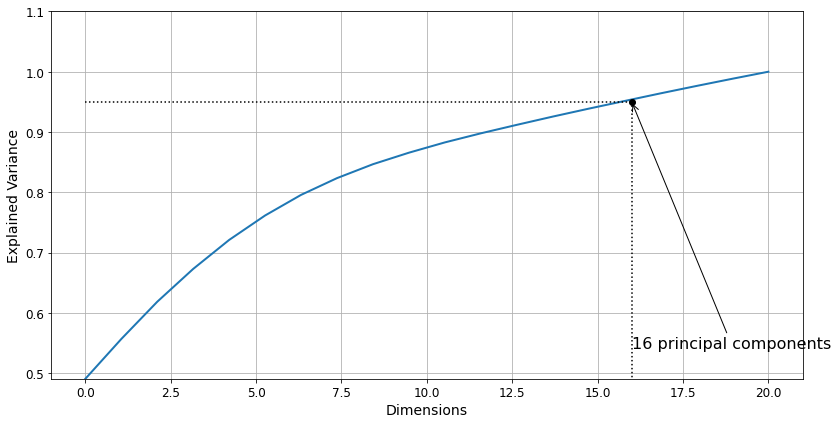

In [ ]:
# plot 
x_dims = np.linspace(0, d_tot, d_tot)
plt.figure(figsize=(12,6))
plt.plot(x_dims, cumsum_eig, linewidth=2)
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.ylim([cumsum_eig[0],1.1])
plt.plot([d, d], [0, p], "k:")
plt.plot([0, d], [p, p], "k:")
plt.plot(d, p, "ko")
plt.annotate("16 principal components", xy=(d, p), xytext=(d, cumsum_eig[0]+0.05),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()

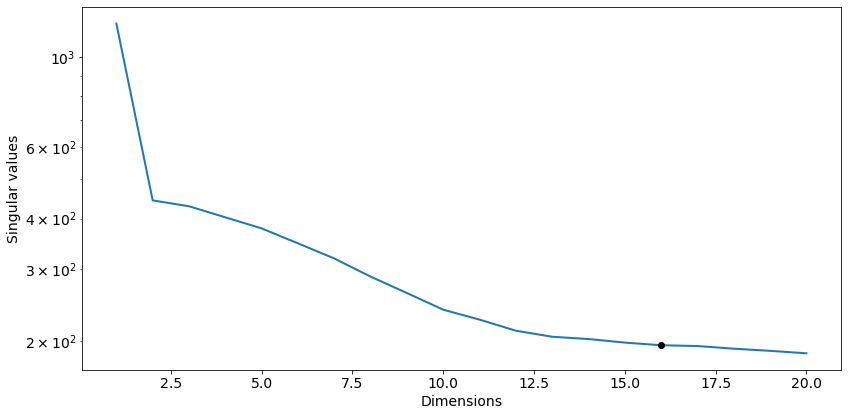

In [ ]:
# Plot   
mpl.rcParams.update({'font.size': 14})
mpl.rc('xtick', labelsize=14) 
mpl.rc('ytick', labelsize=14) 
mpl.rc('axes', labelsize=14)

fig, ax = plt.subplots(1,1,figsize=(12,6))
ax.plot(range(1,len(pca.singular_values_)+1), pca.singular_values_, linewidth=2)
ax.set_xlabel("Dimensions")
ax.set_ylabel("Singular values")
#ax.set_xscale('log')
ax.set_yscale('log') 
#ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
#plt.yscale('log') 
ax.plot(d, pca.singular_values_[d-1], "ko")
# ax.annotate("16 principal components", xy=(d, pca.singular_values_[d-1]), xytext=(d+2, 1e5),
#              arrowprops=dict(arrowstyle="->"), fontsize=22)
ax.grid()
#ax.grid(True, which="both", ls="-", color='0.65')
plt.tight_layout()
#plt.savefig('PCA_sv1.eps')

ax.grid()
#ax.grid(True, which="both", ls="-", color='0.65')
plt.tight_layout()

### Applying PCA

Given the above number of components required to express 95% of the total variance, the following applies PCA with this dimensionality reduction

In [ ]:
pca_compress = PCA(n_components=d) # d=16
X_train_pca = pca_compress.fit_transform(norm_vals)
X_recovered = pca_compress.inverse_transform(X_train_pca)

# below should now show false as were are losing (limited) data through 
# dimensionality reduction
print(np.allclose(X_recovered, norm_vals))
print(X_train_pca.shape)

False
(148906, 16)


#### Need to NORMALISE PCA basis functions to become orthonormal not just orthogonal
$$\mathbf{R}^T\mathbf{R} = \mathbf{I}$$ 

In [ ]:
# X_train_pca = X_train_pca/np.linalg.norm(X_train_pca)
# X_train_pca[:,1] = X_train_pca[:,1]/np.linalg.norm(X_train_pca[:,1])
norm_pca = X_train_pca

# 16 basis functions - normalising each diagonal value
for i in range(d):
    norm_pca[:,i] = X_train_pca[:,i]/np.linalg.norm(X_train_pca[:,i])

# check to ensure that (R^T)R = I
np.around(norm_pca.T @ norm_pca, decimals=10)

array([[ 1.,  0., -0., -0.,  0.,  0., -0., -0., -0.,  0.,  0., -0., -0.,
        -0.,  0., -0.],
       [ 0.,  1., -0., -0.,  0., -0., -0.,  0., -0., -0.,  0.,  0., -0.,
         0.,  0.,  0.],
       [-0., -0.,  1.,  0., -0.,  0.,  0.,  0., -0.,  0.,  0.,  0., -0.,
         0.,  0., -0.],
       [-0., -0.,  0.,  1., -0., -0.,  0., -0., -0., -0., -0., -0.,  0.,
        -0.,  0., -0.],
       [ 0.,  0., -0., -0.,  1.,  0.,  0., -0., -0., -0., -0.,  0., -0.,
         0., -0.,  0.],
       [ 0., -0.,  0., -0.,  0.,  1., -0.,  0., -0., -0.,  0.,  0.,  0.,
        -0.,  0., -0.],
       [-0., -0.,  0.,  0.,  0., -0.,  1.,  0., -0., -0., -0.,  0.,  0.,
        -0.,  0., -0.],
       [-0.,  0.,  0., -0., -0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
        -0., -0., -0.],
       [-0., -0., -0., -0., -0., -0., -0.,  0.,  1.,  0., -0., -0., -0.,
         0., -0., -0.],
       [ 0., -0.,  0., -0., -0., -0., -0.,  0.,  0.,  1.,  0.,  0., -0.,
         0.,  0., -0.],
       [ 0.,  0.,  0., -0., -0

In [ ]:
def calculateerror(X_train_1D, X_train_1D_recovered):
    abs_error = abs(X_train_1D - X_train_1D_recovered)
    perc_error = abs_error*100/abs(X_train_1D)
    
    print('max_abs_error: ',np.max(abs(X_train_1D - X_train_1D_recovered)))
    print('mean_abs_error: ',np.mean(abs(X_train_1D - X_train_1D_recovered)))

In [ ]:
calculateerror(norm_vals, X_recovered)

max_abs_error:  1.9353920851963522
mean_abs_error:  0.126160262812734


#### Obtaining POD coefficients
$$\alpha = \mathbf{R}^{T}\mathbf{X}$$ 

In [ ]:
print("shape of POD basis functions: R: ", np.shape(norm_pca))
print("shape of snapshot matrix, X: ", np.shape(norm_vals))

shape of POD basis functions: R:  (148906, 16)
shape of snapshot matrix, X:  (148906, 20)


In [ ]:
pod_coeffs = norm_pca.T @ norm_vals
#pod_coeffs

In [ ]:
pod_coeffs.shape
# (nComponents x nSnapshots)

(16, 20)

In [ ]:
pca_compress

PCA(copy=True, iterated_power='auto', n_components=243, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
print(pca_compress.singular_values_)
#print(pod_coeffs.T)
print(pod_coeffs.T)
print(np.allclose(X_train_pca[0].T, pca_compress.singular_values_))

[1209.06196764  443.33049827  428.86560942  402.66892362  378.24251126
  347.4357386   318.88329381  287.69926107  262.11711606  238.4431234
  225.40477241  211.67896687  204.5350572   201.92007923  197.85990861
  194.92237935]
[[-260.07774261  -56.61345264   61.90472559   94.75071391  -97.3734412
  -101.00154626  101.20605279   94.04942431   86.73903238   81.96245365
   -68.67570452   50.48135238   41.33708905  -29.64507064   29.78664566
   -20.15383841]
 [-266.93879937  -88.28120807   86.79795442  125.1906379   -99.61566385
   -91.22908205   56.44647095   31.37884283   -5.41992044  -27.73987638
    48.89289322  -55.26267764  -59.4344286    51.93421884  -57.86596029
    43.95832581]
 [-271.46958191 -115.24035359   95.70355429  119.23497098  -55.67217447
   -20.53071485  -34.78582816  -57.99109507  -79.13853256  -72.46766908
    57.27702541  -21.37078067    1.92678573  -21.59315175   45.44117099
   -42.77327784]
 [-271.49731754 -132.30478616   84.69584541   74.40726585   21.28490573
  

In [ ]:
import joblib
joblib.dump(pod_coeffs, "/content/gdrive/MyDrive/ACSE-9/pod_coefficients_300.pkl") 
np.savetxt('/content/gdrive/MyDrive/ACSE-9/X_train_1D_300.csv', norm_vals, delimiter=',') 
np.savetxt('/content/gdrive/MyDrive/ACSE-9/X_train_pca_300.csv', norm_pca, delimiter=',') 

In [ ]:
joblib.dump(pca_compress, '/content/gdrive/MyDrive/ACSE-9/pca_compress_300.pkl')

['/content/gdrive/MyDrive/ACSE-9/pca_compress_300.pkl']